# Load Housing Dataset

In [1]:
from sklearn import datasets
import pandas as pd
housing=datasets.load_boston()
x=housing.data
y=housing.target
X=pd.DataFrame(x,columns=housing.feature_names)
Y=pd.DataFrame(y,columns=['MEDV'])
data=pd.concat([X,Y],axis=1)
print(data.head())
print()
print('Data Shape: ',data.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Data Shape:  (506, 14)


# Select Feature 'RM' and Target to fit Model

In [2]:
x=data[['RM']].values
y=data[['MEDV']].values
from sklearn.linear_model import LinearRegression,RANSACRegressor
ransac=RANSACRegressor(LinearRegression(),
                       max_trials=100,
                       min_samples=50,
                       loss='absolute_loss',
                       residual_threshold=5.0,random_state=0)
ransac.fit(x,y)
y_pred=ransac.predict(x)

# Print and plot slope and intercept of fitted model

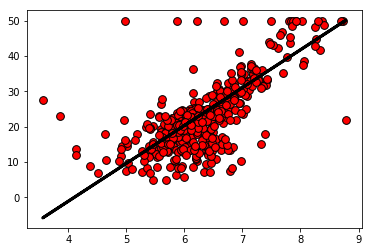

Slope: 10.735
Intercept: -44.089


In [3]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s=60,c='red',edgecolor='black')
plt.plot(x,y_pred,lw=3,c='black')
plt.show()
print('Slope: %.3f'%ransac.estimator_.coef_[0])
print('Intercept: %.3f'%ransac.estimator_.intercept_)

# Show Inlier and outlier data with threshold

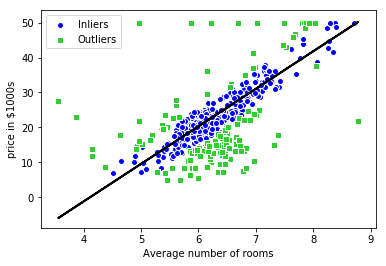

In [4]:
import numpy as np
inliner_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inliner_mask)
plt.scatter(x[inliner_mask],y[inliner_mask],c='blue',
            edgecolor='white',marker='o',label='Inliers')
plt.scatter(x[outlier_mask],y[outlier_mask],c='limegreen',
            edgecolor='white',marker='s',label='Outliers')
plt.plot(x,y_pred,color='black',lw=2)
plt.xlabel('Average number of rooms')
plt.ylabel('price in $1000s')
plt.legend(loc='upper left')
plt.show()

# Compute Performance Metrics of fitted model

In [5]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE:=',mean_squared_error(y,y_pred))
print('R2-Score:=',r2_score(y,y_pred))

MSE:= 45.6200469816
R2-Score:= 0.45960333057
